In [ ]:
import numpy as np

# Define your discrete grid points for r and theta
r_values = np.array([1, 2, 3, 4, 5])  # example discrete r values
theta_values = np.linspace(0, 2*np.pi, 36, endpoint=False)  # example discrete theta values

# Function to convert (x, y) to (r, theta)
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

# Function to find the closest discrete value
def find_closest_value(value, discrete_values):
    index = (np.abs(discrete_values - value)).argmin()
    return discrete_values[index]

# Example (x, y) point
x, y = 3.5, 2.5

# Convert (x, y) to (r, theta)
r, theta = cartesian_to_polar(x, y)

# Normalize theta to be within [0, 2*pi)
theta = theta % (2 * np.pi)

# Find the closest discrete r and theta values
closest_r = find_closest_value(r, r_values)
closest_theta = find_closest_value(theta, theta_values)

print(f"Original (x, y): ({x}, {y})")
print(f"Converted to polar (r, theta): ({r}, {theta})")
print(f"Closest discrete (r, theta): ({closest_r}, {closest_theta})")



In [ ]:
theta_values

In [ ]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
# theta = theta +1*sqrt(2*self.d*self.delt)*np.random.normal(0,1
theta_values = []
change_values = []
theta = 0 
for i in range(50):
    change =  1*sqrt(2*1*0.01)*np.random.normal(0,1)
    change_deg = change*180/np.pi
    theta = theta + change_deg
    change_values.append(change_deg)
    theta_values.append(theta)
    # theta += np.pi/18.


plt.plot(change_values)
plt.xlabel('steps')
plt.ylabel('Del Theta')
plt.title('deL theta values over time')
plt.show()

plt.plot(theta_values)
plt.xlabel('steps')
plt.ylabel('Theta')
plt.title('Theta values over time')
plt.show()

8.102846845413955


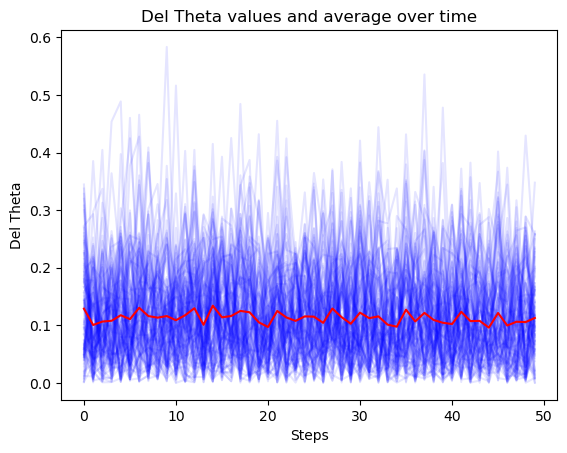

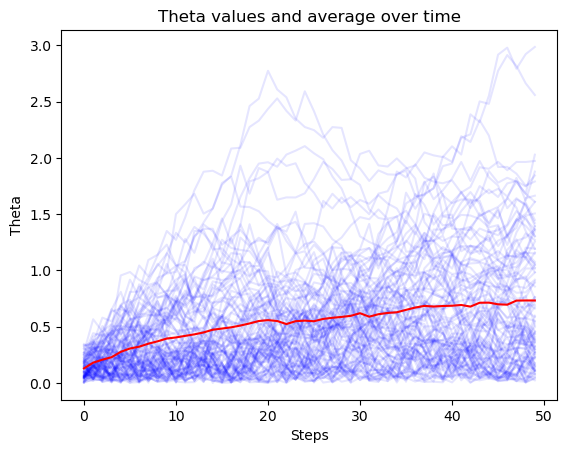

In [17]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
d = 1
delt = 0.01
n_episodes = 100
all_change_values = []
all_theta_values = []
print(sqrt(2*d*delt)*180/np.pi)
for episode in range(n_episodes):
    theta_values = []
    change_values = []
    theta = 0 
    for i in range(50):
        change =  1*sqrt(2*d*delt)*np.random.normal(0,1)
        change_deg = change#*180/np.pi
        theta = theta + change_deg
        theta = np.arccos(np.cos(theta))
        change_deg = np.arccos(np.cos(change_deg))
        change_values.append(change_deg)
        theta_values.append(theta)

    all_change_values.append(change_values)
    all_theta_values.append(theta_values)

# Convert lists of lists into 2D numpy arrays for easier manipulation
all_change_values = np.array(all_change_values)
all_theta_values = np.array(all_theta_values)

# Calculate averages along the episode axis
avg_change_values = np.mean(all_change_values, axis=0)
avg_theta_values = np.mean(all_theta_values, axis=0)

# Plot all change values and their average
for change_values in all_change_values:
    plt.plot(change_values, color='blue', alpha=0.1)  # Plot each episode's values in light blue
plt.plot(avg_change_values, color='red')  # Plot average values in red
plt.xlabel('Steps')
plt.ylabel('Del Theta')
plt.title('Del Theta values and average over time')
# plt.savefig('5p2.png')
plt.show()


# Plot all theta values and their average
for theta_values in all_theta_values:
    plt.plot(theta_values, color='blue', alpha=0.1)  # Plot each episode's values in light blue
plt.plot(avg_theta_values, color='red')  # Plot average values in red
plt.xlabel('Steps')
plt.ylabel('Theta')
plt.title('Theta values and average over time')
#
# plt.savefig('5p3.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

x = []
running =0
sum = []
more = 0 
for i in range(10000):   
    xx = np.random.normal(0,1)
    if (xx>1 or xx<-1):
        more +=1
    running += xx
    sum.append(running)
    x.append(xx)
# plt.plot(x, color = 'blue'  , aplha = 0.1)

print(more)
plt.plot(x, color='blue', alpha=0.5)
# plt.plot(sum, color = 'red')
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='r', linestyle='--')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to your PNG files
fig1_path = '5p1.png'
fig2_path = '5p2.png'
fig3_path = '5p3.png'
fig4_path = '5p4.png'

# Load the images
img1 = mpimg.imread(fig1_path)
img2 = mpimg.imread(fig2_path)
img3 = mpimg.imread(fig3_path)
img4 = mpimg.imread(fig4_path)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Display each image in a subplot
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')  # Hide the axis
axs[0, 0].set_title('Figure 1')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')
axs[0, 1].set_title('Figure 2')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')
axs[1, 0].set_title('Figure 3')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')
axs[1, 1].set_title('Figure 4')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined figure
plt.savefig('combined_figure5.png')

# Show the combined figure
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

"""
Create Your Own Active Matter Simulation (With Python)
Philip Mocz (2021) Princeton Univeristy, @PMocz

Simulate Viscek model for flocking birds

"""



def main():
	""" Finite Volume simulation """
	
	# Simulation parameters
	v0           = 1.0      # velocity
	eta          = 0.5      # random fluctuation in angle (in radians)
	L            = 10       # size of box
	R            = 1        # interaction radius
	dt           = 0.2      # time step
	Nt           = 200     # number of time steps
	N            = 5     # number of birds
	plotRealTime = True
	
	# Initialize
	np.random.seed(17)      # set the random number generator seed

	# bird positions
	x = np.random.rand(N,1)*L*0
	y = 0*np.random.rand(N,1)*L
	# print(x,y)	
	# bird velocities
	theta = 0*2 * np.pi * np.random.rand(N,1)
	vx = v0 * np.cos(theta)
	vy = v0 * np.sin(theta)
	
	# Prep figure
	fig = plt.figure(figsize=(4,4), dpi=80)
	ax = plt.gca()
	
	# Simulation Main Loop
	for i in range(Nt):

		# move
		x += vx*dt
		y += vy*dt
		
		# apply periodic BCs
		x = x % L
		y = y % L
		
		# find mean angle of neighbors within R
		mean_theta = theta
		for b in range(N):
			neighbors = (x-x[b])**2+(y-y[b])**2 < R**2
			sx = np.sum(np.cos(theta[neighbors]))
			sy = np.sum(np.sin(theta[neighbors]))
			mean_theta[b] = np.arctan2(sy, sx)
			
		# add random perturbations
		theta = mean_theta + eta*(np.random.rand(N,1)-0.5)
		
		# update velocities
		vx = v0 * np.cos(theta)
		vy = v0 * np.sin(theta)
		
		# plot in real time
		if plotRealTime or (i == Nt-1):
			plt.cla()
			plt.quiver(x,y,vx,vy)
			ax.set(xlim=(0, L), ylim=(0, L))
			ax.set_aspect('equal')	
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)
			plt.pause(0.001)
				
	# Save figure
	# plt.savefig('activematter.png',dpi=240)
	plt.show()
	    
	return 0



if __name__== "__main__":
  main()


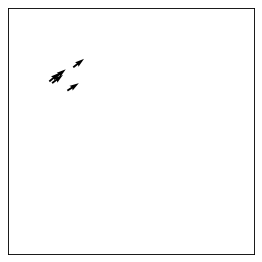

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

"""
Create Your Own Active Matter Simulation (With Python)
Philip Mocz (2021) Princeton Univeristy, @PMocz

Simulate Viscek model for flocking birds

"""

def update(frame, x, y, vx, vy, theta, eta, dt, L, R, ax):
    """ Update function for animation """
    
    # move
    x += vx * dt
    y += vy * dt
    
    # apply periodic BCs
    x = x % L
    y = y % L
    
    # find mean angle of neighbors within R
    mean_theta = theta.copy()
    for b in range(len(x)):
        neighbors = (x - x[b])**2 + (y - y[b])**2 < R**2
        sx = np.sum(np.cos(theta[neighbors]))
        sy = np.sum(np.sin(theta[neighbors]))
        mean_theta[b] = np.arctan2(sy, sx)
        
    # add random perturbations
    theta[:] = mean_theta + eta * (np.random.rand(len(x), 1) - 0.5)
    
    # update velocities
    vx[:] = np.cos(theta)
    vy[:] = np.sin(theta)
    
    # clear and plot
    ax.clear()
    ax.quiver(x, y, vx, vy)
    ax.set(xlim=(0, L), ylim=(0, L))
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

def main():
    """ Finite Volume simulation """
    
    # Simulation parameters
    v0           = 1.0      # velocity
    eta          = 0.2      # random fluctuation in angle (in radians)
    L            = 10       # size of box
    R            = 1        # interaction radius
    dt           = 0.2      # time step
    Nt           = 1000     # number of time steps
    N            = 5     # number of birds
    
    # Initialize
    np.random.seed(17)      # set the random number generator seed

    # bird positions
    x,y=0,0
    x = np.random.rand(N, 1) * L
    y = np.random.rand(N, 1) * L
    
    # bird velocities
    theta = 0
    theta += 2 * np.pi * np.random.rand(N, 1)
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    
    # Prep figure
    fig, ax = plt.subplots(figsize=(4, 4), dpi=80)
    
    # Animation function
    anim = FuncAnimation(fig, update, frames=Nt, fargs=(x, y, vx, vy, theta, eta, dt, L, R, ax))
    
    # Save the animation
    anim.save('activematter.mp4', writer='ffmpeg', dpi=240, fps=30)
    
    plt.show()
    return 0

if __name__ == "__main__":
    main()
